In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import tensorflow as tf
import tensorflow
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
import cv2
import time
import random
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation  

In [3]:
# Path to Datasets
# Training Path
train_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training/NORMAL"
train_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training/OSCC"

# Validation Path 
valid_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation/NORMAL"
valid_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation/OSCC"

# Testing Path 
test_normal_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing/NORMAL"
test_oscc_path = "/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing/OSCC"

In [4]:
# Making Directory of Images
# Training Images
train_normal_image = os.listdir(train_normal_path)
train_oscc_image = os.listdir(train_oscc_path)

#Validation Images
valid_normal_image = os.listdir(valid_normal_path)
valid_oscc_image = os.listdir(valid_oscc_path)

#Testing Images
test_normal_image = os.listdir(test_normal_path)
test_oscc_image = os.listdir(test_oscc_path)

In [5]:
# Printing Numbers of Images in each Dataset
print("Number of Normal Images in Training = ",len(train_normal_image))
print("Number of OSCC Images in Training = ",len(train_oscc_image))

print('\n')
print("Number of Normal Images in Validation = ",len(valid_normal_image))
print("Number of OSCC Images in Validation = ",len(valid_oscc_image))

print('\n')
print("Number of Normal Images in Testing = ",len(test_normal_image))
print("Number of OSCC Images in Testing = ",len(test_oscc_image))

Number of Normal Images in Training =  1859
Number of OSCC Images in Training =  2356


Number of Normal Images in Validation =  402
Number of OSCC Images in Validation =  509


Number of Normal Images in Testing =  401
Number of OSCC Images in Testing =  508


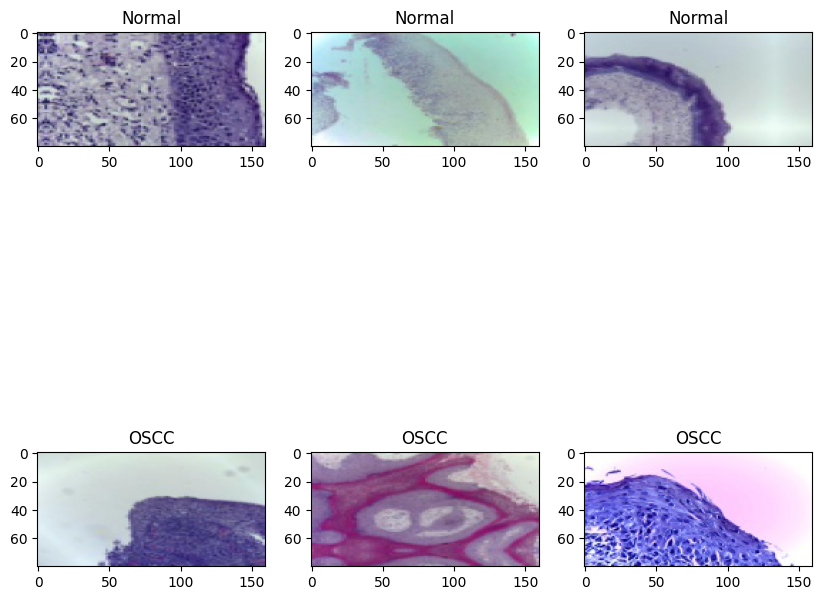

In [6]:
#Training Data
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(train_normal_path + '/' + random.choice(train_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

for i in range(3):
  img = plt.imread(train_oscc_path + '/' + random.choice(train_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("OSCC")
  m=m+1

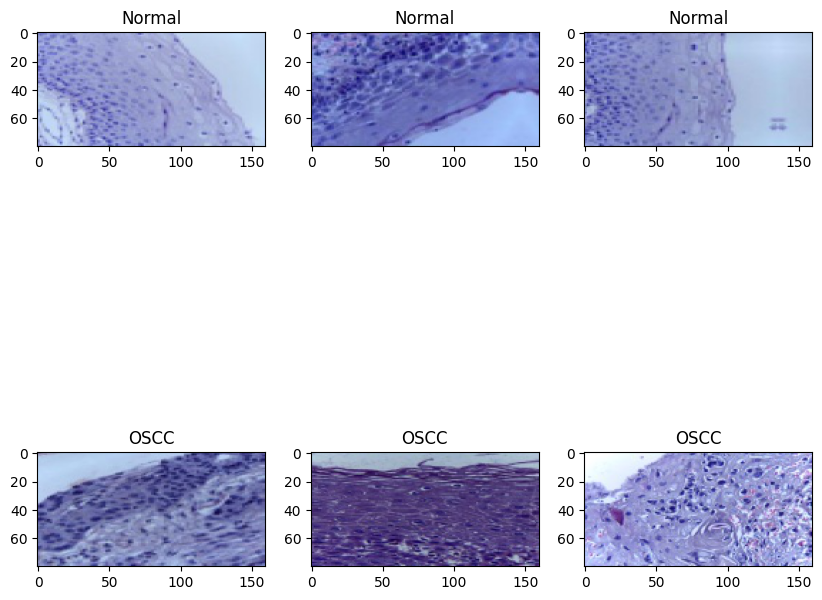

In [7]:
#Validation
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(valid_normal_path + '/' + random.choice(valid_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Normal")
  m=m+1

for i in range(3):
  img = plt.imread(valid_oscc_path + '/' + random.choice(valid_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("OSCC")
  m=m+1

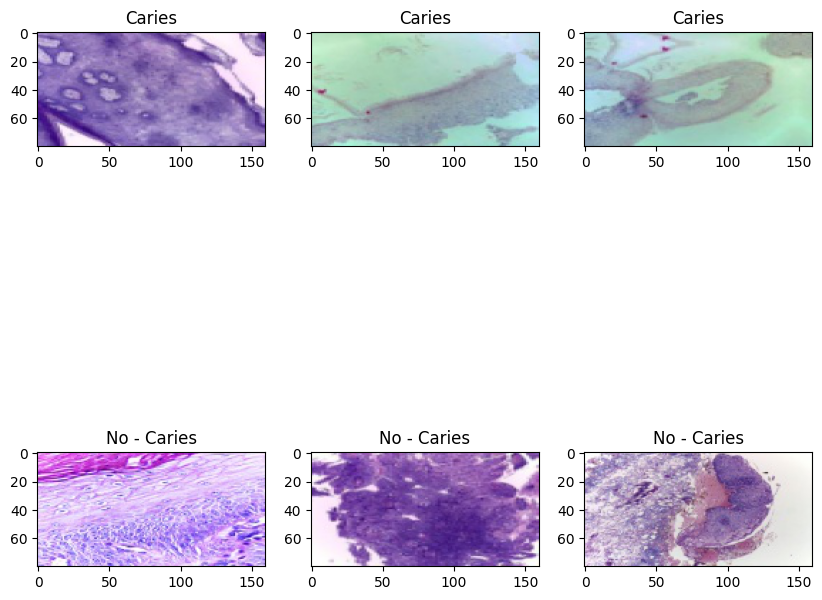

In [8]:
#Test Data
m=0
fig, axes = plt.subplots(2,3, figsize=(10,10))
axes = axes.ravel()

for i in range(3):
  img = plt.imread(test_normal_path + '/' + random.choice(test_normal_image))
  axes[m].imshow(img)
  axes[m].set_title("Caries")
  m=m+1

for i in range(3):
  img = plt.imread(test_oscc_path + '/' + random.choice(test_oscc_image))
  axes[m].imshow(img)
  axes[m].set_title("No - Caries")
  m=m+1

In [9]:
#Model
# Model
model=tf.keras.applications.resnet50.ResNet50(weights='imagenet',include_top=False)
# Design new model
x=model.output
x=tf.keras.layers.GlobalMaxPool2D()(x)
x=tf.keras.layers.Dense(512,activation='relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(512, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense(1024, activation = 'relu')(x)
x=tf.keras.layers.Dropout(0.3)(x)
preds = tf.keras.layers.Dense(2, activation = 'softmax')(x)  # This layer will have output. So It will have only one neuron
efficent_model=tf.keras.models.Model(inputs = model.input, outputs = preds)
opt=tf.keras.optimizers.legacy.SGD(learning_rate=0.001, decay=1e-6, momentum=0.9, nesterov=True)
efficent_model.compile(loss=tf.keras.losses.categorical_crossentropy,optimizer=opt,metrics=['accuracy'])
efficent_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                             

In [10]:
for i,layer in enumerate(efficent_model.layers):
  print(i,layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn

In [11]:
# set layers for training
#layer upto 185 are already trained

for layer in efficent_model.layers[:185]:
  layer.trainable=False
for layer in efficent_model.layers[185:]:
  layer.trainable=True

In [12]:
# prepare Training data
train_generator=ImageDataGenerator()
#train_generator=ImageDataGenerator(preprocessing_function=tf.keras.applications.efficientnet_v2.preprocess_input)
train_data=train_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Training",target_size=(150,150),class_mode='categorical', shuffle=True)

Found 4215 images belonging to 2 classes.


In [13]:
# prepare Validation data
valid_generator=ImageDataGenerator()
valid_data=valid_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Validation",target_size=(150,150),class_mode='categorical',shuffle=True)

Found 911 images belonging to 2 classes.


In [14]:
#prepare Test data
test_generator=ImageDataGenerator()
test_data=test_generator.flow_from_directory("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/Resized_main/Testing",target_size=(224,224),class_mode='categorical',shuffle=True)

Found 909 images belonging to 2 classes.


In [15]:
train_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [16]:
valid_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [17]:
test_data.class_indices

{'NORMAL': 0, 'OSCC': 1}

In [18]:
hist=efficent_model.fit(train_data, epochs=2,validation_data=valid_data)

Epoch 1/2
132/132 [==============================] - 1928s 15s/step - loss: 0.6807 - accuracy: 0.7300 - val_loss: 0.9293 - val_accuracy: 0.5873
Epoch 2/2
132/132 [==============================] - 1725s 13s/step - loss: 0.2619 - accuracy: 0.8977 - val_loss: 0.5130 - val_accuracy: 0.7991


In [20]:
final_model= model.save("/content/drive/MyDrive/Cache/AI - Sem 6/HICD/resnet50.h5")